In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import xticks

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data_df=pd.read_csv(r'C:\AIML\05Assignments\german_credit.csv')

In [4]:
data_df.head(2) # check for data upload()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [5]:
data_df.shape #check the shape of data

(1000, 21)

In [6]:
data_df.info() # check channel names and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
# seperate col names with numeric type
col_num=[] 
data_df.dtypes
for i in data_df.columns:
    if data_df[i].dtypes=='int64':
      col_num.append(i)
    
print('len : %0.0f\n%s' %(len(col_num),col_num))

len : 8
['default', 'duration_in_month', 'credit_amount', 'installment_as_income_perc', 'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance']


In [8]:
# seperate col names with cat type
col_cat=[]
data_df.dtypes
for i in data_df.columns:
    if data_df[i].dtypes!='int64':
      col_cat.append(i)
print('len : %0.0f\n%s' %(len(col_cat),col_cat))

len : 13
['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [9]:
for i in col_cat:  # change data type of non numeric to category
  data_df[i]=data_df[i].astype('category')
data_df.info() # check for data type change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null category
duration_in_month             1000 non-null int64
credit_history                1000 non-null category
purpose                       1000 non-null category
credit_amount                 1000 non-null int64
savings                       1000 non-null category
present_emp_since             1000 non-null category
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null category
other_debtors                 1000 non-null category
present_res_since             1000 non-null int64
property                      1000 non-null category
age                           1000 non-null int64
other_installment_plans       1000 non-null category
housing                       1000 non-null category
credits_this_bank             1000 non-null int64
job           

In [10]:
data_df.describe(include=['int64']).transpose() # check for statistic for all numeric columns

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


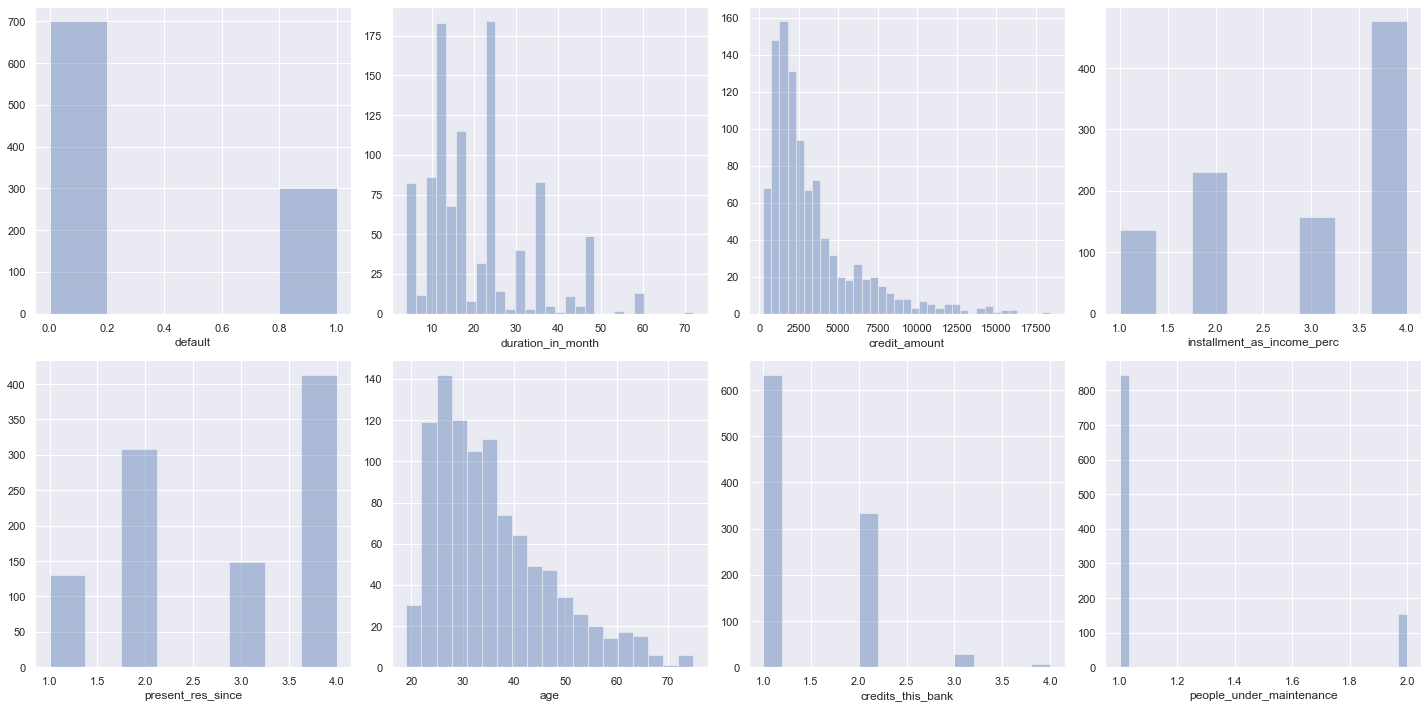

In [11]:
sns.set() # plot numeric columns
rows =2
cols=4
i=0
j=0
k=0

fig, axs = plt.subplots(rows,cols,figsize=(20,10))

while(j<rows):
    k=0
    while(k < cols) :
        if i>len(col_num)-1:
            break
        sns.distplot(data_df[col_num[i]],ax=axs[j,k],kde=False)
            #for p in g.patches :
            #g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i+=1
        k+=1
    j+=1
fig.tight_layout()

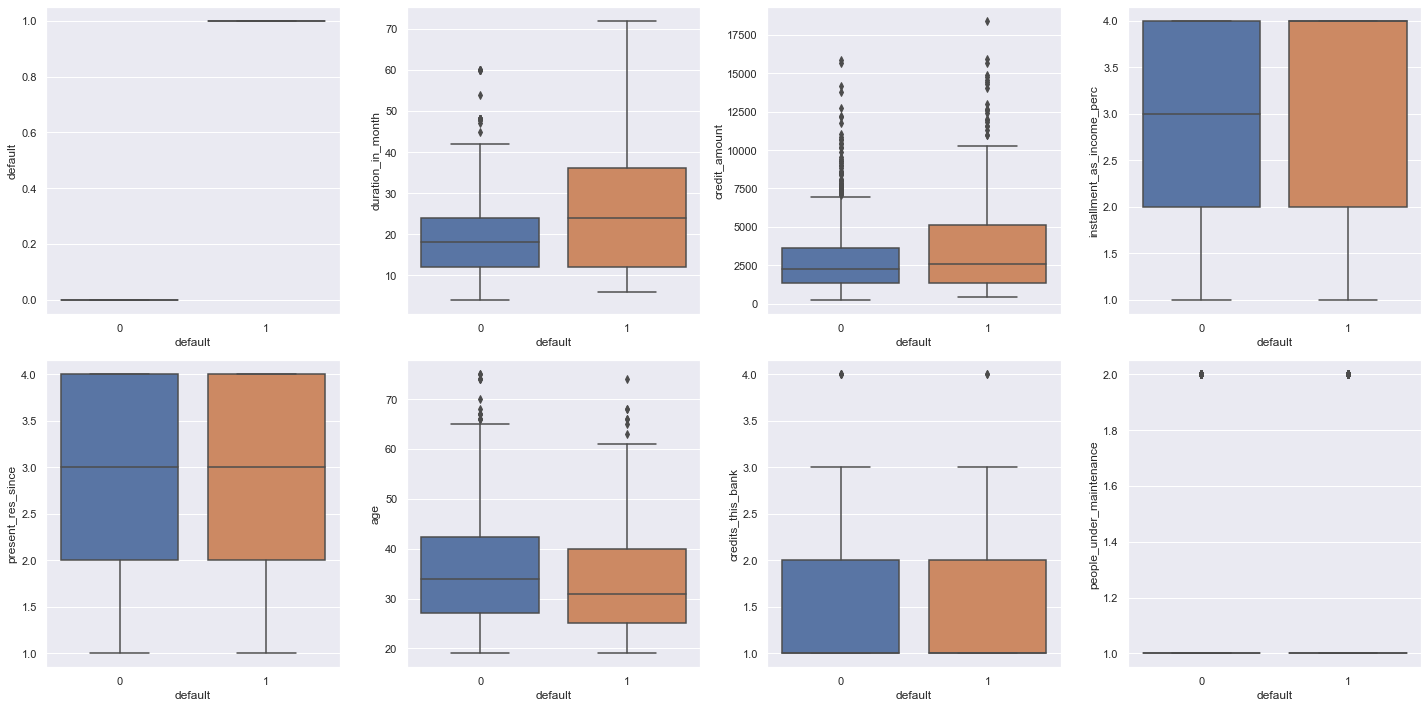

In [12]:
sns.set() # plot numeric columns
rows =2
cols=4
i=0
j=0
k=0

fig, axs = plt.subplots(rows,cols,figsize=(20,10))

while(j<rows):
    k=0
    while(k < cols) :
        if i>len(col_num)-1:
            break
        sns.boxplot(y=col_num[i],ax=axs[j,k],x='default',data=data_df)
            #for p in g.patches :
            #g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i+=1
        k+=1
    j+=1
fig.tight_layout()

In [13]:
data_df.describe(include=['category']).transpose() # check for stats of non numeric data

,count,unique,top,freq
account_check_status,1000,4,no checking account,394
credit_history,1000,5,existing credits paid back duly till now,530
purpose,1000,10,domestic appliances,280
savings,1000,5,... < 100 DM,603
present_emp_since,1000,5,1 <= ... < 4 years,339
personal_status_sex,1000,4,male : single,548
other_debtors,1000,3,none,907
property,1000,4,"if not A121/A122 : car or other, not in attrib...",332
other_installment_plans,1000,3,none,814
housing,1000,3,own,713


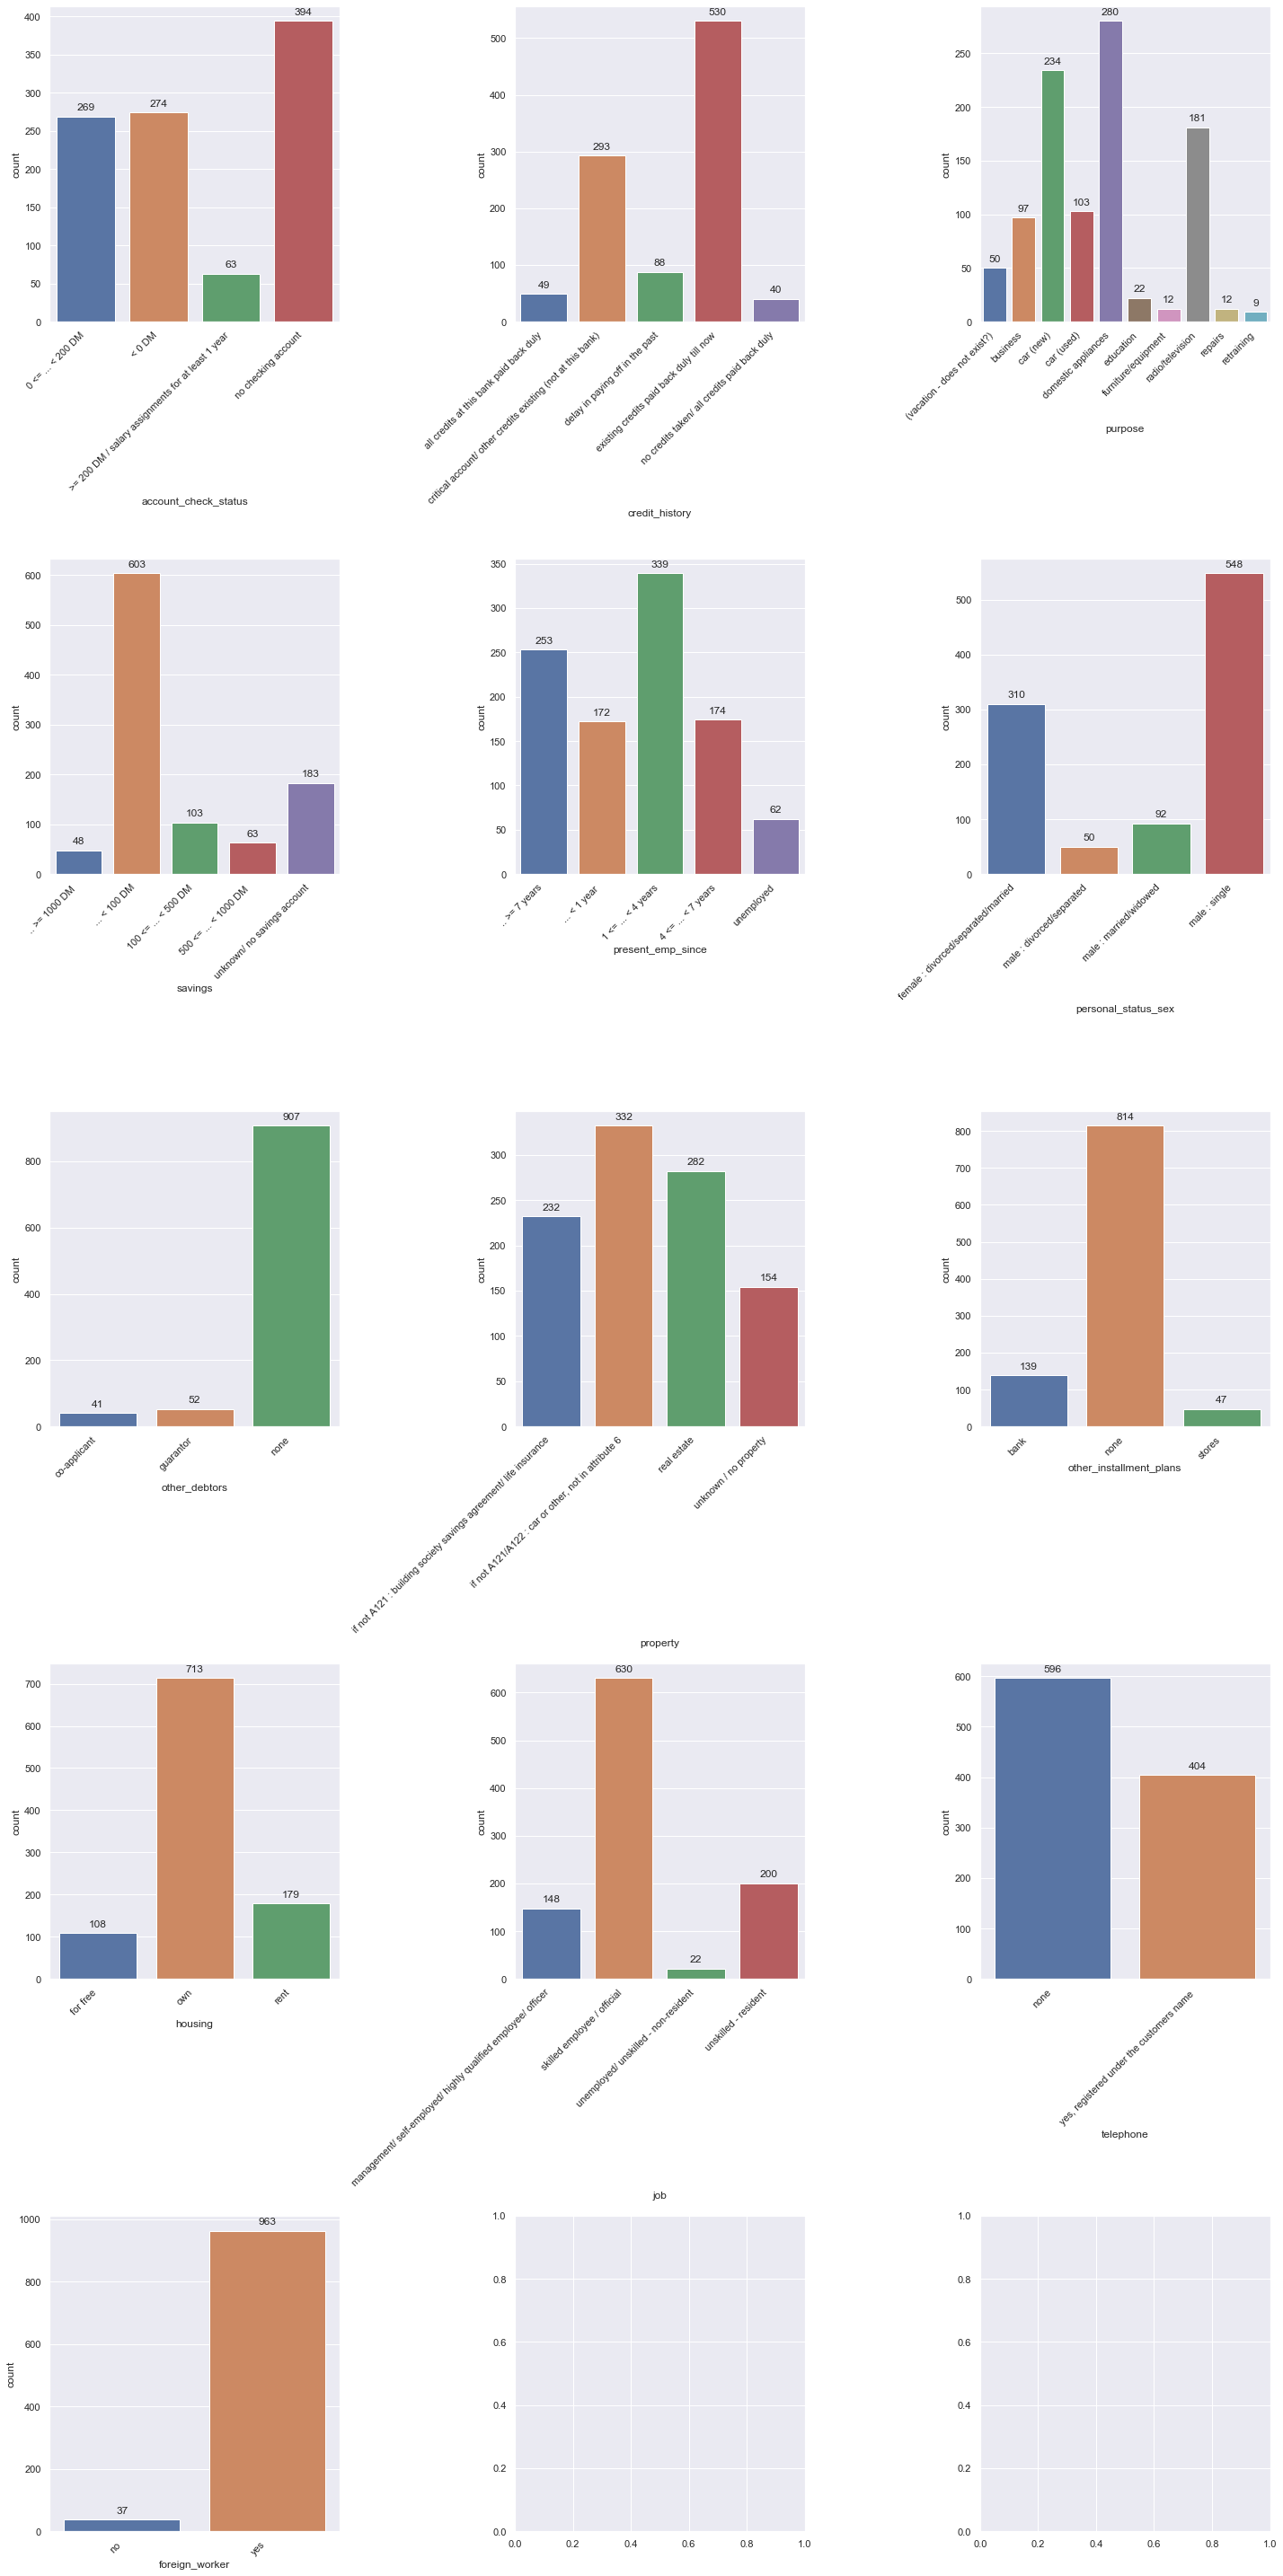

In [14]:
sns.set()  # plot category columns
rows =5
cols=3
i=0
j=0
k=0

fig, axs = plt.subplots(rows,cols,figsize=(20,40))

while(j<rows):
    k=0
    while(k < cols) :
        if i>len(col_cat)-1:
            break
        g=sns.countplot(x=col_cat[i],data=data_df,ax=axs[j,k])
        g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
        for p in g.patches :
            g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i+=1
        k+=1
    j+=1
fig.tight_layout()

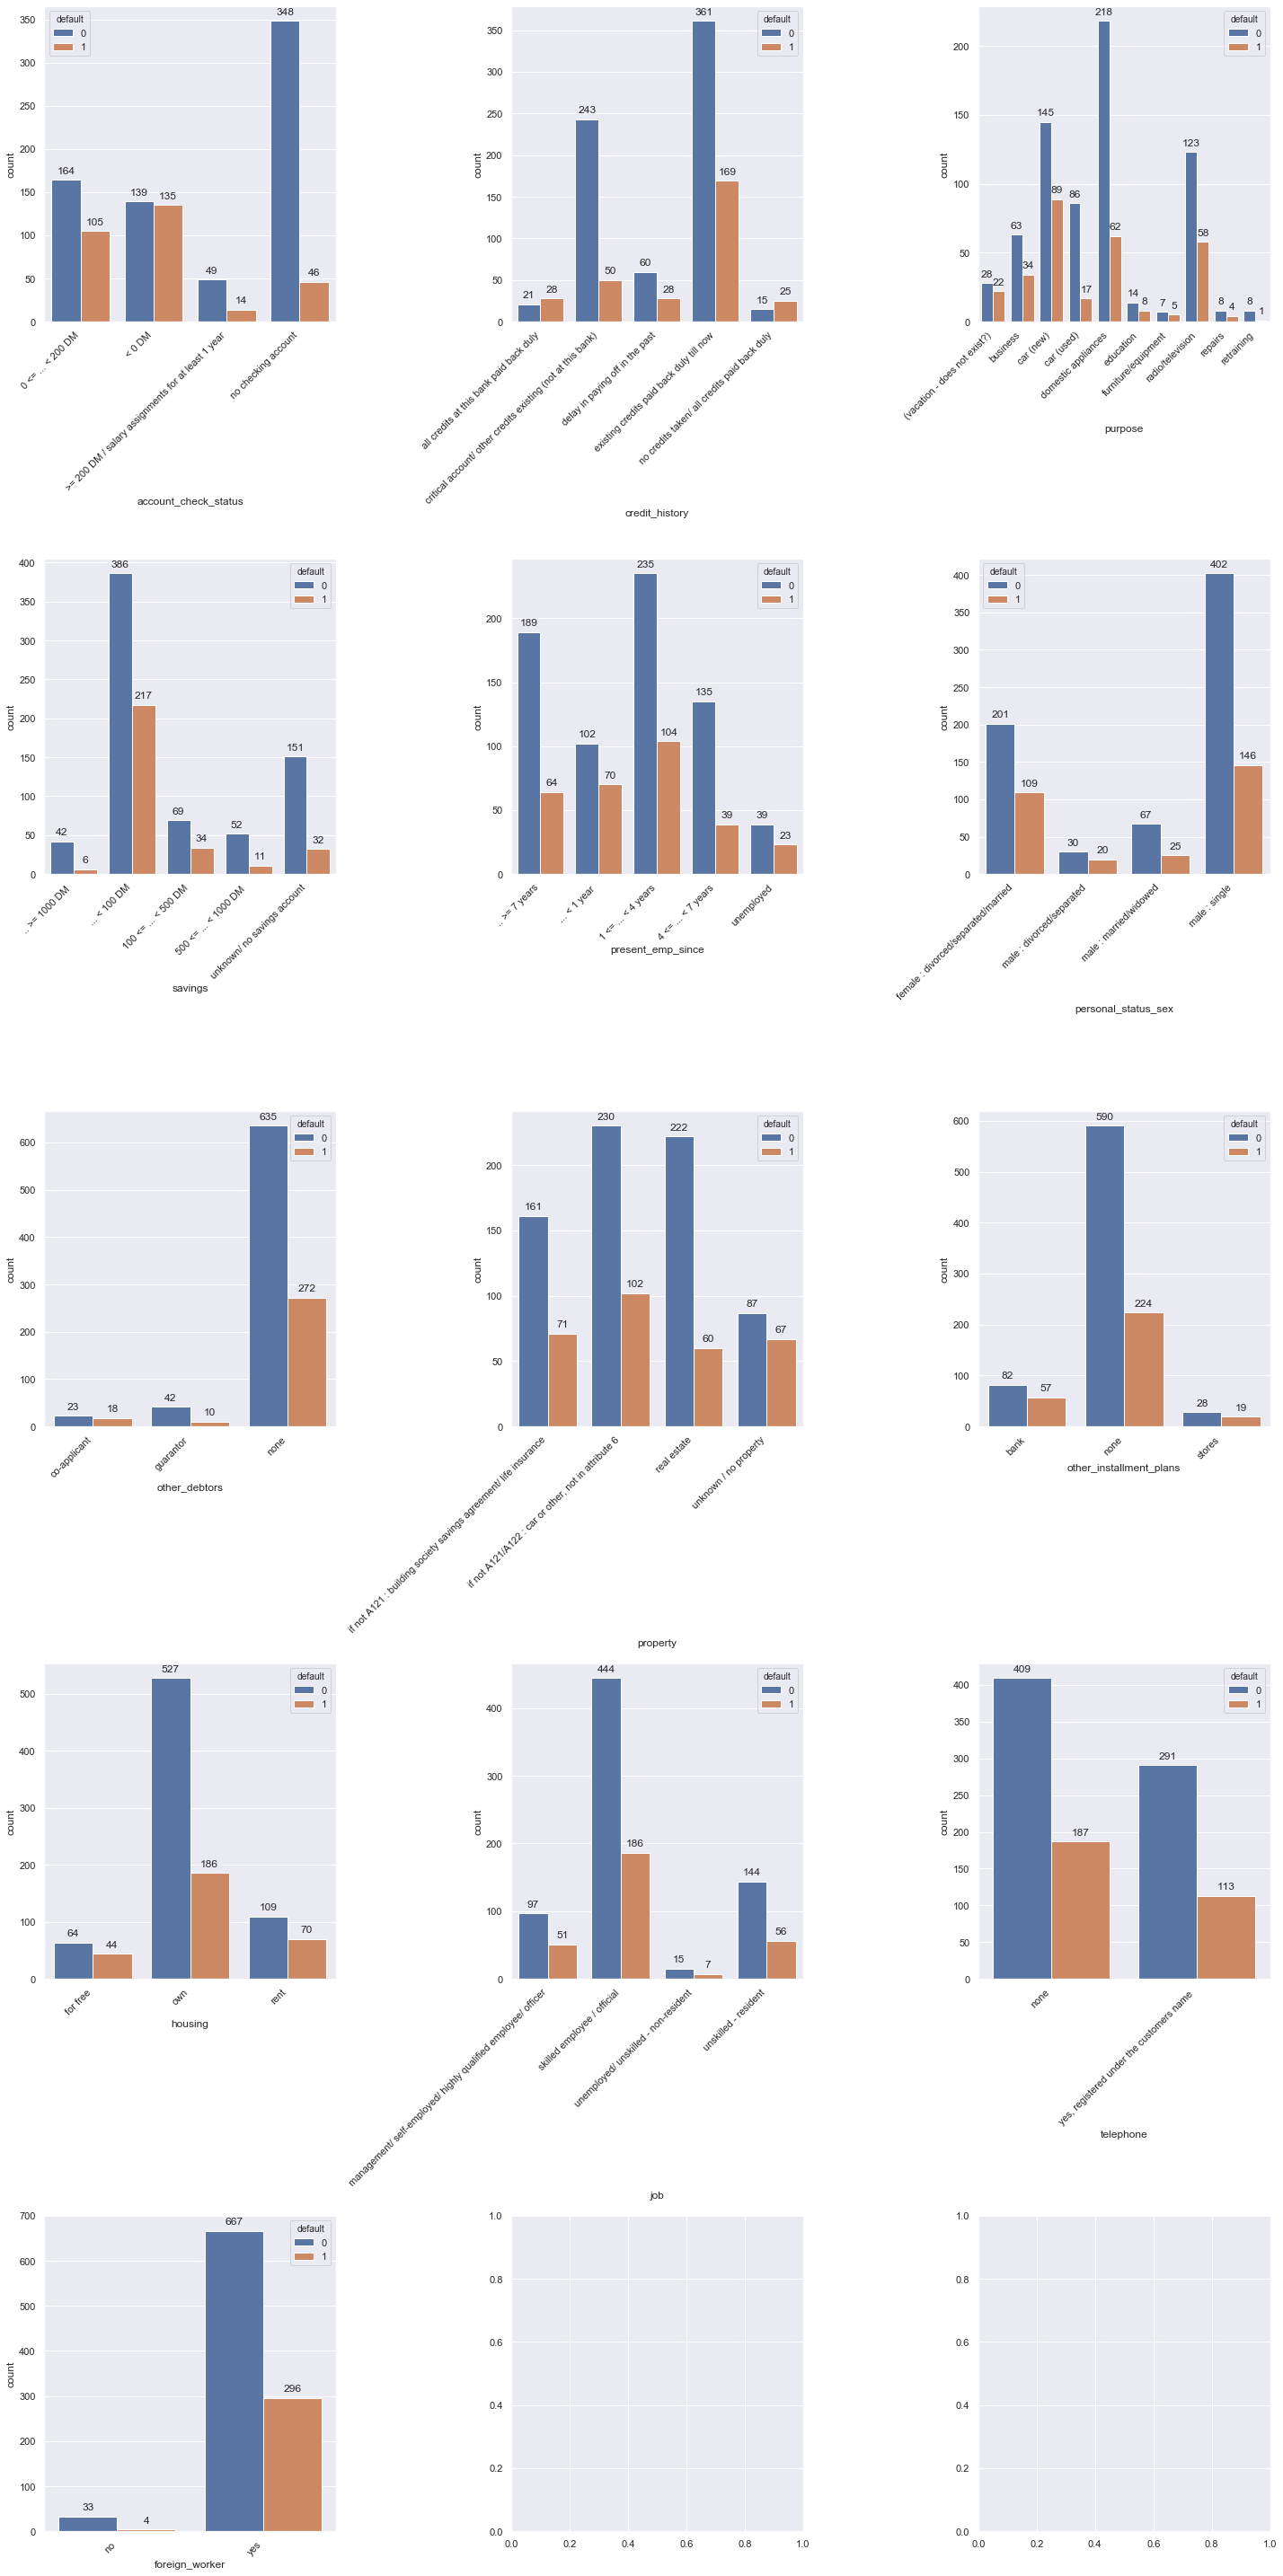

In [15]:
# bivariate analysis
sns.set()  # plot category columns
rows =5
cols=3
i=0
j=0
k=0

fig, axs = plt.subplots(rows,cols,figsize=(20,40))

while(j<rows):
    k=0
    while(k < cols) :
        if i>len(col_cat)-1:
            break
        g=sns.countplot(x=col_cat[i],data=data_df,ax=axs[j,k],hue='default')
        g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
        for p in g.patches :
            g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i+=1
        k+=1
    j+=1
fig.tight_layout()

In [16]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [17]:
X=data_df.drop('default',axis=1)

In [18]:
y=data_df['default']

In [19]:
X=pd.get_dummies(X) # one hot coding for catagorical variable

In [20]:
X.head() # check data

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [21]:
X.shape

(1000, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [22]:
X.corr() #print corelation matrix

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,-0.076455,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,-0.100510,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,-0.041591,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,-0.064303,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,0.037504,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,-0.040213,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,-0.008700,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,-0.157296,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,-0.159297,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.157296,-0.159297,1.000000,...,0.018934,-0.035183,-0.015346,-0.022932,0.073347,1.440549e-02,0.028955,-0.028955,0.036392,-0.036392


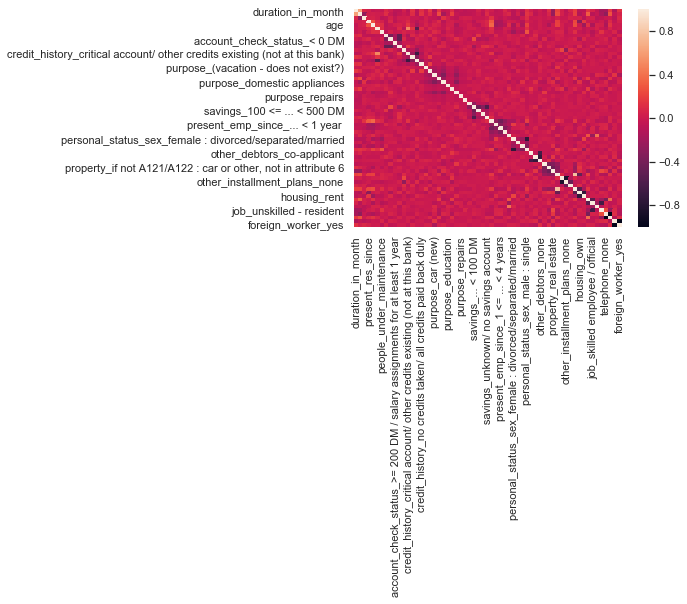

In [23]:
sns.heatmap(X.corr())

### Drop the original variables which are converted to dummy

In [24]:
# not required as data doesnot contain orginals . only dummy are available... probably as the datatype was changed to category previously.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0) # split the data

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_rf=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999) # set model parameter

In [29]:
model_rf.fit(X_train,y_train) # fit the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=9999,
                       verbose=0, warm_start=False)

In [30]:
y_train_predict=model_rf.predict(X_train)

In [31]:
y_test_predict=model_rf.predict(X_test) # predict for test data

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [32]:
# import library
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
print ('Accuracy score -Train data : ',accuracy_score(y_train,y_train_predict)) # accuracy train set

Accuracy score -Train data :  1.0


In [34]:
print ('Confusion matrix - Train data\n',confusion_matrix(y_train,y_train_predict) )# confusion matrix train set

Confusion matrix - Train data
 [[486   0]
 [  0 214]]


In [35]:
print('+++++++++Classfication report-Train data+++++++++\n',classification_report(y_train,y_train_predict)) # classification test set

+++++++++Classfication report-Train data+++++++++
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       214

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [36]:
print ('Accuracy Score-Test Data :',accuracy_score(y_test,y_test_predict)) #accuracy test set

Accuracy Score-Test Data : 0.76


Since the testset score is significantly lower than train test score it indicate that the model is over fit and regularization is required.

In [37]:
print('Confusion Matrix-Test data\n',confusion_matrix(y_test,y_test_predict) )# print confusion matrix of test set

Confusion Matrix-Test data
 [[190  24]
 [ 48  38]]


In [38]:
print('+++++Classification reprot of Random Forest model-Test Data++++\n\n',classification_report(y_test,y_test_predict)) # classification test set

+++++Classification reprot of Random Forest model-Test Data++++

               precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.61      0.44      0.51        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.68       300
weighted avg       0.75      0.76      0.75       300



### Q6 Show the list of the features importance( 1 Marks)

In [39]:
temp=pd.DataFrame(model_rf.feature_importances_,index=X.columns,columns=['Score'])

In [40]:
temp.sort_values(by=['Score'],axis=0,ascending=False) # sorted features

,Score
credit_amount,0.100844
duration_in_month,0.077155
age,0.075707
account_check_status_no checking account,0.048111
account_check_status_< 0 DM,0.034319
present_res_since,0.034185
installment_as_income_perc,0.033802
credit_history_critical account/ other credits existing (not at this bank),0.019579
credits_this_bank,0.019288
property_real estate,0.018942


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [42]:
# Use below values
num_folds = 10
seed = 77

In [43]:
kfold=KFold(n_splits=num_folds,shuffle=False,random_state=seed)
Scoring='accuracy'

In [44]:
#Validate the Random Forest model build above using k fold

K fold validation is used to check the robustness /generalization capability of the model during
1) Regularization/optimization
2) Model selection/comparision.
Typically this is done by spliting  the train data in smaller train and test data sets and performance is checked. There can be different stratergies for data sets generated by kfold methods.
Advantage of K fold method is that training data itself is used for the above purpose and no addittional data is required.
After regularization or model selection is completed (depending on what is the objective) , test set is used for final validation.
However the above question requires random forest model to be validated using k fold.Hence we shall do the Kfold validation using the entire data (no spliting) and check the accuracy, confusion matrix and precision and recall rates.It is expected that the performance would be close to that obtained with random forest model(no regularization done so far) with test data.

In [45]:
cv_result=cross_val_score(model_rf,X,y,cv=kfold,scoring=Scoring)

In [46]:
#Calculate Mean score

In [47]:
print('Mean Score : %0.3f'%(cv_result.mean())) #print mean score

Mean Score : 0.765


In [48]:
# Calculate score standard deviation using std)

In [49]:
print('Standard deviation Score : %0.3f'%(cv_result.std())) # print standard deviation

Standard deviation Score : 0.050


# Q8 Print the confusion matrix( 1 Marks)

In [50]:
cv_predicted=cross_val_predict(model_rf,X,y,cv=kfold)  #store predicted values during Kfold trials

In [51]:
print('Confusion Matrix\n',confusion_matrix(y,cv_predicted)) # confusion matric

Confusion Matrix
 [[649  51]
 [184 116]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [52]:
print ('Percentage of correct prediction :',accuracy_score(y,cv_predicted)*100)

Percentage of correct prediction : 76.5


In [53]:
print('++++++++++Classification Report of Kfold Trials+++++++++++\n\n',classification_report(y,cv_predicted)) # classification report of Kfold trials

++++++++++Classification Report of Kfold Trials+++++++++++

               precision    recall  f1-score   support

           0       0.78      0.93      0.85       700
           1       0.69      0.39      0.50       300

    accuracy                           0.77      1000
   macro avg       0.74      0.66      0.67      1000
weighted avg       0.75      0.77      0.74      1000



Overall inference :
The data is distributed as 70 : 30 (Non defaulter : Defaulters).Hence if we say all cases are non defauter than also it would 70% corrrect(without any model), where as model has improved the overall prediction accuracy by 6.5%.Overall accuracy is only 76.5%
The model is not a stronger predictor for identifying defaulter(recall rate : 39%).
Further regularizaiton to be done to improve the model prediction accuracy.

Hyperparameter Tuning for better results

In [54]:
# parameter for model tuning
param = {'n_estimators': [10,50,100,200,300,400,500],  
         'max_features': [2,4,6,8,10,12,14,16,18,20,21]}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# define the model
gs = GridSearchCV(RandomForestClassifier(criterion='entropy',random_state=9999), param_grid=param,cv=kfold,scoring='accuracy')

In [57]:
#fit the model
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=77, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              

In [58]:
gs.best_params_  # best parameter

{'max_features': 6, 'n_estimators': 400}

In [59]:
gs.best_score_ # best score

0.7671428571428571

In [60]:
gs.best_estimator_  # best parameter setting

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=9999,
                       verbose=0, warm_start=False)

In [61]:
# define the model with tunned parameter
model_rf_tuned=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=9999,
                       verbose=0, warm_start=False)

In [62]:
model_rf_tuned.fit(X_train,y_train) # fit the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=9999,
                       verbose=0, warm_start=False)

In [63]:
y_test_predicted_tuned=model_rf_tuned.predict(X_test) # predict test data

In [64]:
print('Accuracy with parameter tunned RF model :',accuracy_score(y_test,y_test_predicted_tuned))

Accuracy with parameter tunned RF model : 0.7766666666666666


In [65]:
print('Confusion with parameter tunned RF model\n',confusion_matrix(y_test,y_test_predicted_tuned))

Confusion with parameter tunned RF model
 [[196  18]
 [ 49  37]]


In [66]:
print('Classification report with parameter tunned RF model\n',classification_report(y_test,y_test_predicted_tuned))

Classification report with parameter tunned RF model
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       214
           1       0.67      0.43      0.52        86

    accuracy                           0.78       300
   macro avg       0.74      0.67      0.69       300
weighted avg       0.76      0.78      0.76       300



Summary of the parameter tunned model : 
Accuracy score improved from 76% to 77.6%
Recall rate for defaulter reduced from .44 to .43 however it is better than 0.39 observed during Kfold trial where full data was used. Hence the parameter tunned model is more robust and preferred.

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [67]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [68]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model_rf.fit(X_, y_)
    y_pred_bot = model_rf.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred_bot)
    accuracy.append(acc)

In [69]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge:%0.3f '%(accuracy.mean()))
print('Standard deviation: %0.3f '%(accuracy.std()))

Accuracy Score
Avearge:0.764 
Standard deviation: 0.011 
